In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
path = r"C:\Data\Waste_Intervention\Census_Tables\Cleaned"
fList = os.listdir(path)

In [5]:
dfs = {}

for doc in fList:
    i = "{}\\{}".format(path, doc)
    j = doc.split("_")[-1][:-4]
    
    dfs[j] = pd.read_csv(i, na_values=("-"))
    
    df = pd.read_csv(i, na_values=("-"))
    #print dfs  
        
    df = df.fillna(0)
    print df.head(10)

           Id2  med_age
0  60855001001     27.2
1  60855001002     33.7
2  60855001003     26.9
3  60855001004     34.1
4  60855002001     30.6
5  60855002002     36.9
6  60855002003     36.9
7  60855002004     29.2
8  60855003001     37.3
9  60855003002     35.4
           Id2  White  AfAm  NatAm  Asian  Hawaiin  Other  Inter
0  60855001001    310     0      0    112        0    500     10
1  60855001002    397    18     12    727        0    717     65
2  60855001003    731     0      0    403        0   1418     68
3  60855001004    755   150     22    559        0    756     94
4  60855002001    796    43     50    212       63    154    250
5  60855002002    337   118     12     46        0    123     58
6  60855002003    812    83      0    250        0    376    190
7  60855002004    895    88     29    629        0    602     53
8  60855003001    265    65      7     54        0     35    127
9  60855003002   1865   215     20    726        0    202    209
           Id2  Total

In [6]:
tabs = dfs.values()
df = tabs.pop()
for x in tabs:
    df = df.merge(x, how='outer')

df.to_csv(r"C:\Data\CO_054\census_merged_2.csv", index=False)


In [110]:
rts = pd.read_csv(r"C:\Data\CO_054\MtVwResRCY.csv")

In [111]:
rts.columns = [x.lower() for x in rts.columns]
rts.head(2)

,fid,loc_name,status,score,match_addr,pct_along,side,ref_id,ref_id_side,x,...,sl_set,trip,arrival_ti,service_si,sequence,route,cycle_day,partition,service_mode,geo_index
0,569,CO_052_053_054,M,100.0,1097 MERCY ST,97.959184,L,"23,708,145.00",23708145L,-122.084501,...,0,0,0,0,0,2F1A,0,NaN,NaN,0
1,"1,648",NaN,M,0.0,NaN,0.000000,R,"23,749,160.00",23749160R,-122.071408,...,0,0,0,0,0,4F1A,0,NaN,NaN,0


In [11]:

check = rts.groupby(['ref_id']).apply(np.mode)

AttributeError: 'module' object has no attribute 'mode'

In [112]:
rts_f1 = rts.loc[rts['z1tims'] < 2]
mxRt = rts_f1.groupby(['ref_id_side', 'route']).size().reset_index(name='count')
mxRt = mxRt.sort_values(by=(['ref_id_side', 'count']))
mxRt = mxRt.drop_duplicates('ref_id_side', keep='last')
#count = mxRt['ref_id_side']
mxRt.head(5)
mxRt.to_csv(r"C:\Data\CO_054\maxRCY.csv", index=False)
type(mxRt)

pandas.core.frame.DataFrame

In [113]:
len(mxRt)

2827

In [94]:
def get_mode(group):
    return group.mode()[0]

In [95]:
rts_f1 = rts.loc[rts['z1tims'] < 2]
merged = rts_f1.merge(rts_f1.groupby(['ref_id_side'])['route'].apply(get_mode).reset_index(), how='left', indicator=True)
merged[merged['_merge'] != 'both'].groupby(['ref_id_side', 'route']).size().to_csv(r"C:\Data\CO_054\noMaxYW.csv")

In [96]:
fix = merged[merged['_merge'] != 'both'].groupby(['ref_id_side', 'route']).size()


In [97]:
final = rts.merge(mxRts)

NameError: name 'mxRts' is not defined

In [9]:
# Group by BG ID and route to get the count of rount numbers in a block group

bgRoute = pd.read_csv(r"C:\Data\Waste_Intervention\Mountain_View\AllComs.csv", low_memory=False)
#create series that gets number of route stops in a BG, include route to do a join later as we will be using the route count
bg = bgRoute.groupby(['GEOID','Z1COMM','Route']).size().reset_index(name='count')

# mkae a dataframe getting the count of stops per commodity in each BG
bgCom = bgRoute.groupby(['GEOID','Z1COMM']).size().reset_index(name='count')

# create a dateframe that gets a count of the route that can be joined back to the BG table
rt = bgRoute.groupby(['Route', 'Z1COMM']).size().reset_index(name='count') 

bgRt = pd.merge(bg, rt, on = 'Route')
bgRtCom = pd.merge(bgRt, bgCom, left_on=(['GEOID','Z1COMM_x']), right_on=(['GEOID', 'Z1COMM']))

In [10]:
bgRtCom.head()

,GEOID,Z1COMM_x,Route,count_x,Z1COMM_y,count_y,Z1COMM,count
0,60855046011,G,303X,4,G,622,G,367
1,60855046011,G,404X,363,G,817,G,367
2,60855092023,G,303X,148,G,622,G,152
3,60855092023,G,305X,4,G,725,G,152
4,60855093031,G,303X,9,G,622,G,162


In [11]:
bgRtCom['perRt'] = bgRtCom['count_x'] / bgRtCom['count_y']

In [12]:
bgRtCom.head()

,GEOID,Z1COMM_x,Route,count_x,Z1COMM_y,count_y,Z1COMM,count,perRt
0,60855046011,G,303X,4,G,622,G,367,0.006431
1,60855046011,G,404X,363,G,817,G,367,0.444308
2,60855092023,G,303X,148,G,622,G,152,0.237942
3,60855092023,G,305X,4,G,725,G,152,0.005517
4,60855093031,G,303X,9,G,622,G,162,0.014469


In [13]:
wt = pd.read_csv(r"C:\Data\Waste_Intervention\Mountain_View\Rts_Wts.csv")
wt.head()

,Route,Tons
0,101X,4.470000
1,102X,6.063750
2,103X,8.566000
3,104X,7.159412
4,105X,7.731053


In [14]:
y_raw = pd.merge(bgRtCom, wt, on='Route')

In [15]:

y_raw['bgTons'] = y_raw['perRt'] * y_raw['Tons']
y_raw.head()

,GEOID,Z1COMM_x,Route,count_x,Z1COMM_y,count_y,Z1COMM,count,perRt,Tons,bgTons
0,60855046011,G,303X,4,G,622,G,367,0.006431,6.764667,0.043503
1,60855092023,G,303X,148,G,622,G,152,0.237942,6.764667,1.609599
2,60855093031,G,303X,9,G,622,G,162,0.014469,6.764667,0.097881
3,60855093041,G,303X,336,G,622,G,337,0.540193,6.764667,3.654225
4,60855093042,G,303X,115,G,622,G,115,0.184887,6.764667,1.250702


In [16]:
y_con = y_raw.groupby(['GEOID', 'Z1COMM_x'])[['bgTons']].sum().reset_index()

In [17]:
y_G = y_con[y_con['Z1COMM_x'] == 'G']
y_O = y_con[y_con['Z1COMM_x'] == 'O']
y_R = y_con[y_con['Z1COMM_x'] == 'R']

In [18]:
y_G.head()

,GEOID,Z1COMM_x,bgTons
0,60855046011,G,3.417532
3,60855091051,G,6.038411
6,60855091052,G,2.820326
9,60855091053,G,3.001942
12,60855091081,G,1.776370


In [19]:
y_GO = pd.merge(y_G, y_O, on='GEOID')

In [20]:
y_GO.head()# y =  pd.merge(y_GO, y_R, on='GEOID')

,GEOID,Z1COMM_x_x,bgTons_x,Z1COMM_x_y,bgTons_y
0,60855046011,G,3.417532,O,2.715642
1,60855091051,G,6.038411,O,3.142073
2,60855091052,G,2.820326,O,2.109063
3,60855091053,G,3.001942,O,1.826215
4,60855091081,G,1.776370,O,1.170674


In [21]:
 y =  pd.merge(y_GO, y_R, on='GEOID')

In [22]:
y.head()

,GEOID,Z1COMM_x_x,bgTons_x,Z1COMM_x_y,bgTons_y,Z1COMM_x,bgTons
0,60855046011,G,3.417532,O,2.715642,R,1.419062
1,60855091051,G,6.038411,O,3.142073,R,3.062613
2,60855091052,G,2.820326,O,2.109063,R,1.794390
3,60855091053,G,3.001942,O,1.826215,R,1.100159
4,60855091081,G,1.776370,O,1.170674,R,0.488146


In [23]:
y['totalWaste'] = y['bgTons_x'] + y['bgTons_y'] + y['bgTons']

In [24]:
y.head()

,GEOID,Z1COMM_x_x,bgTons_x,Z1COMM_x_y,bgTons_y,Z1COMM_x,bgTons,totalWaste
0,60855046011,G,3.417532,O,2.715642,R,1.419062,7.552236
1,60855091051,G,6.038411,O,3.142073,R,3.062613,12.243097
2,60855091052,G,2.820326,O,2.109063,R,1.794390,6.723779
3,60855091053,G,3.001942,O,1.826215,R,1.100159,5.928316
4,60855091081,G,1.776370,O,1.170674,R,0.488146,3.435189


In [25]:
y['nonLF'] = y['totalWaste'] - y['bgTons_x']

In [26]:
y.head()

,GEOID,Z1COMM_x_x,bgTons_x,Z1COMM_x_y,bgTons_y,Z1COMM_x,bgTons,totalWaste,nonLF
0,60855046011,G,3.417532,O,2.715642,R,1.419062,7.552236,4.134705
1,60855091051,G,6.038411,O,3.142073,R,3.062613,12.243097,6.204686
2,60855091052,G,2.820326,O,2.109063,R,1.794390,6.723779,3.903453
3,60855091053,G,3.001942,O,1.826215,R,1.100159,5.928316,2.926374
4,60855091081,G,1.776370,O,1.170674,R,0.488146,3.435189,1.658820


In [27]:
y['per_NLF'] = y['nonLF']/y['totalWaste']

In [28]:
y.head()

,GEOID,Z1COMM_x_x,bgTons_x,Z1COMM_x_y,bgTons_y,Z1COMM_x,bgTons,totalWaste,nonLF,per_NLF
0,60855046011,G,3.417532,O,2.715642,R,1.419062,7.552236,4.134705,0.547481
1,60855091051,G,6.038411,O,3.142073,R,3.062613,12.243097,6.204686,0.506791
2,60855091052,G,2.820326,O,2.109063,R,1.794390,6.723779,3.903453,0.580545
3,60855091053,G,3.001942,O,1.826215,R,1.100159,5.928316,2.926374,0.493627
4,60855091081,G,1.776370,O,1.170674,R,0.488146,3.435189,1.658820,0.482890


In [33]:
x = pd.read_csv(r"C:\Data\Waste_Intervention\Mountain_View\census_merged_3.csv")
x.head()

,Id2,med_hh_inc,med_age,p_vacant,avg_hh_size,p_renters,p_r1000_plus,p_ccasian,p_phh_ba,p_phh_stem,p_phh_biz,p_phh_ed,p_phh_hum,p_nonfam_hh,p_apt
0,60855001001,59118.0,27.2,0.000000,3.10,0.673423,0.611888,0.332618,0.671329,0.307692,0.132867,0.000000,0.230769,0.391608,0.293706
1,60855001002,110714.0,33.7,0.000000,2.84,0.677642,0.468373,0.205062,0.862952,0.554217,0.147590,0.021084,0.140060,0.343373,0.218373
2,60855001003,62730.0,26.9,0.000000,4.67,0.618702,0.577540,0.279008,0.641711,0.370766,0.149733,0.030303,0.090909,0.351159,0.229947
3,60855001004,85648.0,34.1,0.100679,2.64,0.674658,0.533937,0.323202,0.803167,0.437783,0.138009,0.011312,0.216063,0.420814,0.489819
4,60855002001,103265.0,30.6,0.028517,2.71,0.570927,0.509506,0.507653,0.994297,0.610266,0.057034,0.022814,0.304183,0.513308,0.281369


In [34]:
div_rate = pd.merge(x, y, right_on='GEOID', left_on='Id2')

div_rate.to_csv(r"C:\Data\Waste_Intervention\Mountain_View\div_rate_all.csv")

In [98]:
df = pd.read_csv(r"C:\Data\Waste_Intervention\Mountain_View\div_rate_all.csv")
df['per_NLF'].describe()


count    56.000000
mean      0.509190
std       0.070802
min       0.268017
25%       0.474059
50%       0.506763
75%       0.566571
max       0.613565
Name: per_NLF, dtype: float64

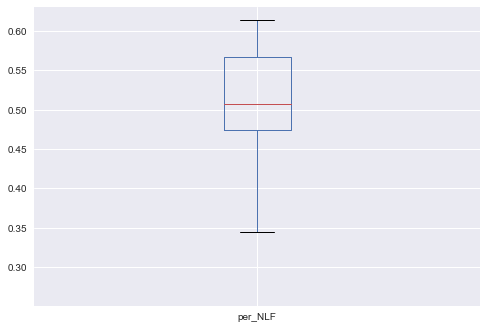

In [100]:
df.boxplot('per_NLF')

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import cross_val_score
from sklearn import (
    metrics, 
    linear_model, 
    ensemble,
    neighbors,
)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import feature_selection

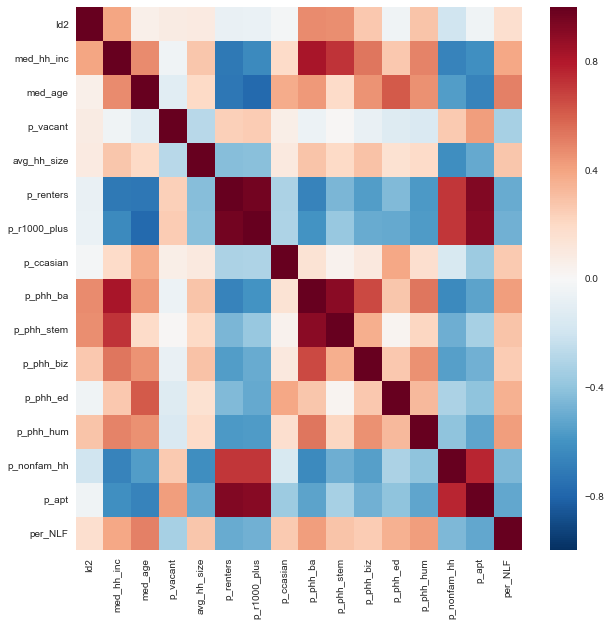

In [49]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), ax=ax)



In [118]:
features_all = df.drop(['per_NLF', 'Id2'], axis=1)
target =  df['per_NLF']

X = features

y = target

# Initialize and fit the model
linreg = LinearRegression()
linreg.fit(X, y)

# Print the intercept and coefficients
print 'Intercept:', linreg.intercept_
print 'Coefficients:',linreg.coef_
print 'R-Squared:', linreg.score(X, y)



Intercept: 0.185102394096
Coefficients: [ -1.91479979e-07   4.60612136e-03  -2.67727530e-01   1.48987359e-02
  -9.87613773e-02   1.52087203e-01   6.34688744e-02   1.89259083e+07
  -1.89259083e+07  -1.89259084e+07  -1.89259082e+07  -1.89259080e+07
  -1.64076285e-02  -1.72521845e-02]
R-Squared: 0.477963521181


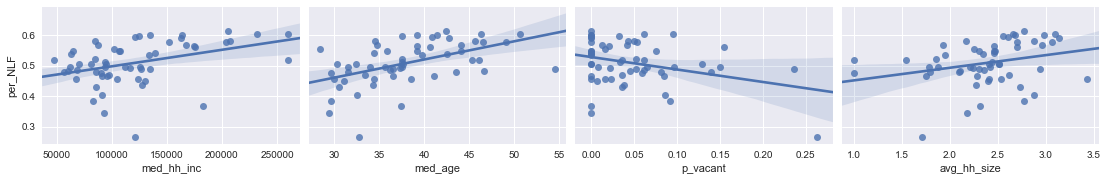

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')


g = sns.pairplot(df, x_vars=['med_hh_inc', 'med_age', 'p_vacant', 'avg_hh_size'], y_vars='per_NLF',  size=15, aspect=0.7, kind='reg')

g.fig.set_size_inches(15,2)


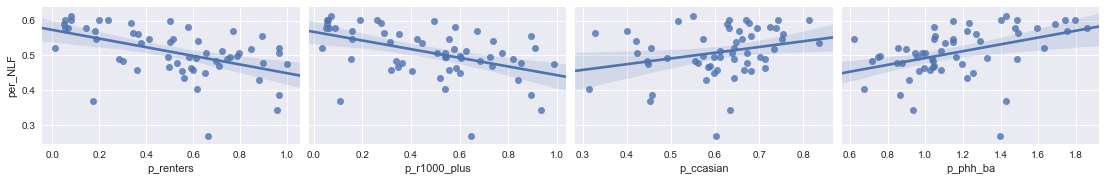

In [104]:
g = sns.pairplot(df, x_vars=['p_renters', 'p_r1000_plus', 'p_ccasian', 'p_phh_ba'], y_vars='per_NLF',  size=15, aspect=0.7, kind='reg')

g.fig.set_size_inches(15,2)

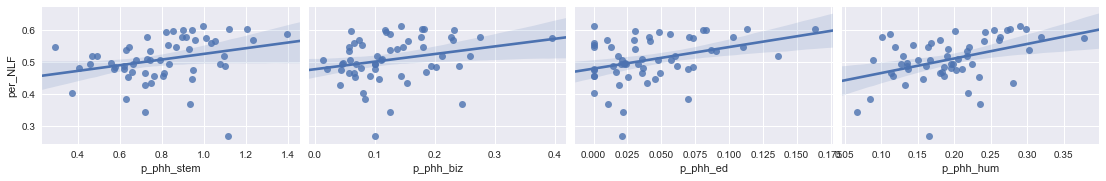

In [107]:
g = sns.pairplot(df, x_vars=['p_phh_stem',
       'p_phh_biz', 'p_phh_ed', 'p_phh_hum'], y_vars='per_NLF',  size=15, aspect=0.7, kind='reg')

g.fig.set_size_inches(15,2)

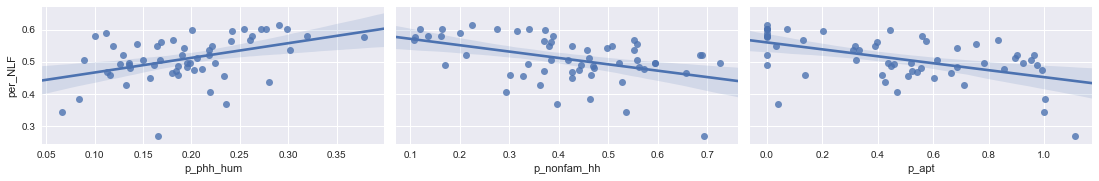

In [106]:


g = sns.pairplot(df, x_vars=[ 'p_phh_hum', 'p_nonfam_hh', 'p_apt'], y_vars='per_NLF',  size=15, aspect=0.7, kind='reg')

g.fig.set_size_inches(15,2)

In [131]:
from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor(n_estimators=50)
cls.fit(X,y)

print cls.score(X,y)
print cross_val_score(cls, X, y )

0.925335251199
[-0.30020396 -0.40860798 -4.77100593]


In [138]:
feature_importances = cls.feature_importances_
f_zip = zip(features, feature_importances)

In [139]:
for i in f_zip:
    print i

('med_hh_inc', 0.021833734605622643)
('med_age', 0.14188542782600144)
('p_vacant', 0.029195688081678238)
('avg_hh_size', 0.06336913162749272)
('p_renters', 0.028119084295113086)
('p_r1000_plus', 0.062194992132091301)
('p_ccasian', 0.041866644171379877)
('p_phh_ba', 0.094887654359521734)
('p_phh_stem', 0.049112841478810759)
('p_phh_biz', 0.012325230754034138)
('p_phh_ed', 0.021225180313106849)
('p_phh_hum', 0.10680549438436307)
('p_nonfam_hh', 0.030785699807264168)
('p_apt', 0.29639319616352)
